<a href="https://colab.research.google.com/github/NSR9/EVA4/blob/master/S8/S8_mainFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required libraries**

In [1]:
#importing python dependencies
from __future__ import print_function
import numpy as np
import sys

#importing Pytorch packages
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import OneCycleLR

# Importing torch summary
!pip install torchsummary
from torchsummary import summary


#Importing matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Importing google drive colab package to load files
from google.colab import drive


In [2]:
# mount the drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# add path to our library in default search path
sys.path.append('/content/drive/My Drive/S7_final')

In [4]:
#importing python modules
import ViewData
import cifar10_models as models # drive
import resnet as rsnet
import execute # this is to train & test the model
import data_transform as dt#import data_transform



Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
# trainloader and testloader defined and loaded
tl = dt.DataTransformandLoad()
channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
trainloader, testloader = tl.TransformAndLoad(mean1 = channel_means,stdev1 = channel_stdevs)

Files already downloaded and verified
Files already downloaded and verified


  car   dog   car   car


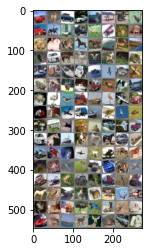

In [6]:
# let us view some training images
ViewData.getTrainImages()

In [7]:
# Model Summary

#using GPU 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

#creating a model
model =  rsnet.ResNet18().to(device)
# View summary of the model
summary(model, input_size=(3, 32, 32))


cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
        BasicBlock-9           [-1, 64, 32, 32]               0
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
          Dropout-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          36,864
      BatchNorm2d-14           [-1

In [8]:
#creating model1 to import test and train modules
model1 = execute.Test_Train()

#defining optimizer and scheduler
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=15)

#Running the Epochs
EPOCHS = 15
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler)
  model1.test(model, device, testloader,"model.pt")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.0793089866638184 Batch_id=390 Accuracy=43.95: 100%|██████████| 391/391 [00:31<00:00, 12.53it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 0.0108).  Saving model ...

Test set: Average loss: 0.0108, Accuracy: 5351/10000 (53.51%)

EPOCH: 2


Loss=1.2346422672271729 Batch_id=390 Accuracy=60.16: 100%|██████████| 391/391 [00:31<00:00, 12.60it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0108 --> 0.0079).  Saving model ...

Test set: Average loss: 0.0079, Accuracy: 6555/10000 (65.55%)

EPOCH: 3


Loss=1.0222817659378052 Batch_id=390 Accuracy=68.82: 100%|██████████| 391/391 [00:30<00:00, 12.63it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0079 --> 0.0073).  Saving model ...

Test set: Average loss: 0.0073, Accuracy: 7029/10000 (70.29%)

EPOCH: 4


Loss=0.38855117559432983 Batch_id=390 Accuracy=75.11: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0073 --> 0.0053).  Saving model ...

Test set: Average loss: 0.0053, Accuracy: 7737/10000 (77.37%)

EPOCH: 5


Loss=0.6341381669044495 Batch_id=390 Accuracy=78.56: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0072, Accuracy: 6953/10000 (69.53%)

EPOCH: 6


Loss=0.5641577243804932 Batch_id=390 Accuracy=81.21: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0053 --> 0.0047).  Saving model ...

Test set: Average loss: 0.0047, Accuracy: 7985/10000 (79.85%)

EPOCH: 7


Loss=0.2334824502468109 Batch_id=390 Accuracy=83.35: 100%|██████████| 391/391 [00:30<00:00, 12.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0047 --> 0.0037).  Saving model ...

Test set: Average loss: 0.0037, Accuracy: 8406/10000 (84.06%)

EPOCH: 8


Loss=0.3897789716720581 Batch_id=390 Accuracy=85.59: 100%|██████████| 391/391 [00:30<00:00, 12.65it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0037 --> 0.0037).  Saving model ...

Test set: Average loss: 0.0037, Accuracy: 8472/10000 (84.72%)

EPOCH: 9


Loss=0.44121116399765015 Batch_id=390 Accuracy=86.96: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 8461/10000 (84.61%)

EPOCH: 10


Loss=0.23318922519683838 Batch_id=390 Accuracy=88.61: 100%|██████████| 391/391 [00:30<00:00, 12.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0037 --> 0.0033).  Saving model ...

Test set: Average loss: 0.0033, Accuracy: 8659/10000 (86.59%)

EPOCH: 11


Loss=0.3008347451686859 Batch_id=390 Accuracy=90.33: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0033 --> 0.0031).  Saving model ...

Test set: Average loss: 0.0031, Accuracy: 8752/10000 (87.52%)

EPOCH: 12


Loss=0.25727537274360657 Batch_id=390 Accuracy=92.25: 100%|██████████| 391/391 [00:31<00:00, 12.59it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.0031 --> 0.0030).  Saving model ...

Test set: Average loss: 0.0030, Accuracy: 8822/10000 (88.22%)

EPOCH: 13


Loss=0.13066360354423523 Batch_id=390 Accuracy=93.85: 100%|██████████| 391/391 [00:30<00:00, 12.67it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8861/10000 (88.61%)

EPOCH: 14


Loss=0.15526637434959412 Batch_id=390 Accuracy=95.37: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8909/10000 (89.09%)

EPOCH: 15


Loss=0.21478304266929626 Batch_id=390 Accuracy=96.22: 100%|██████████| 391/391 [00:30<00:00, 12.66it/s]



Test set: Average loss: 0.0031, Accuracy: 8916/10000 (89.16%)

